# AI I - Assignment 2

This assignment requires you to use [Tensorflow](https://www.tensorflow.org) and [Keras](https://keras.io/). Keras is a high-level Deep Learning API written in Python working as an interface to TensorFlow.

This assignment is divided in two parts. In the first part you will learn about Keras with the help of the example below and the Keras [documentation](https://keras.io/). In the second part, you will practise training a Deep Learning model.

## How to submit
Submit by uploading this notebook to Canvas. It should include **plots**, **results** and **code** showing how the results were genereated.  Remember to name your file(s) appropriately.
It is due on March 18, 2021, at 8:30 am.

## Installation
Instructions can be found here:
* [Tensorflow](https://www.tensorflow.org/install/)

Since Tensorflow 2.0, Keras is included in Tensorflow and will be automatically installed with Tensorflow. It can be accessed as ```tensorflow.keras```

I recommend installing using ```pip```. For Tensorflow is it sufficient to install the CPU version. The GPU version requires a good workstation with high-end Nvidia GPU(s), and it is not necessary for this tutorial.

If you're using a virtualenv:
```
pip3 install tensorflow
```
Add ```sudo``` for a systemwide installation (i.e. no ```virtualenv```).
```
sudo pip3 install tensorflow
```
Make sure that you have ```sklearn```, ```matplotlib``` and ```numpy``` installed, too.


## Part 1 - understand a model

### Optimizers

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater than zero. The goal of training a model is to find a set of weights and biases (i.e. parameters) that have, on average, a low loss across all examples. The term cost is used interchangably with loss. See the [loss section](https://keras.io/losses/) in the Keras documentation for a list and descriptions of what is available.

![Side by side loss](https://drive.google.com/uc?id=1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae)
<b>Figure 1.</b> Left: high loss and right: low loss.

<!-- https://drive.google.com/file/d/1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae/view?usp=sharing
<img src="./fig/LossSideBySide.png" width="500">
<figcaption>Figure. Left: high loss and right: low loss.</figcaption>
 -->
The optimizer is the algorithm used to minimize the loss/cost. Optimizers in neural networks work by finding the gradient/derivative of the loss with respect to the parameters (i.e. the weights). "Gradient" is the correct term since a we are looking at multi-dimensional systems (i.e. many parameters), however, the terms are often used interchangably. For those who didn't take multivariate calculus, just think of the gradient as a derivative. The derivative of the loss with respect to a parameters tells us how much the loss changes when we nudge a weight up or down. So, by knowing how a given parameter affects the loss the optimizer can change it so as to decrease the loss. The various optimizers differ in how they change the weights. 

#### Mini-overview over popular optimizers

* **Stochastic Gradient Descent (SGD)**. This is the most basic and easy to understand optimizer. It updates the weights in the negative direction of the gradient by taking the average gradient of mini-batch of data (e.g. 20-1000 examples) in each step. Vanilla SGD only has one hyper-parameter, the learning rate.
* **Momentum**. This optimizer "gains speed" when the gradient has pointed in the same direction for several consecutive updates. That is, it has a momentum and want to keep moving in that direction. It gains momentum by accumulating an exponentially decaying moving average of past gradients. The step size depends on how large and aligned the sequence of gradients are. The most important hyper-parameter is alpha and common values are 0.5 and 0.9.
* **Nesterov Momentum**. This is a modification of the standard momentum optimizer.
* **AdaGrad**. This optimizer Ada-ptively sets the learning rate depending on the steepness/magnitude of the Grad-ients. This is done so that weights with big gradients get a smaller effective learning rate, and weights with small gradients will get a greater effective learning rate. The result is quicker progress in the more gently sloped directions of the weight space and a slowdown in stepp regions.
* **RMSProp**. This is modification of AdaGrad, where the accumulated gradient decays, that is, the influence of previous gradients gradually decreases.
* **Adam**. The name comes from "adaptive moments", and it is a combination of RMSProp and momentum. It has several hyper-parameters.

The above list just gives a quick overview of some of the most common. However, old optimizers are constantly improved and new are developed. SGD and momentum are most basic and easiest to understand and implement. They are still in use, but the more advanced optimizers tend to be better for practical use. Which one to use is generally an emperical question depending on both the data and the model.

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/), and to see what is available in Keras, see the [optimizer section](https://keras.io/optimizers/) of the documentation.

See the images below for a comparison of optimizers in a 2D space (NAG: Nesterov accelerated gradient, Adadelta: an extension of AdaGrad).

![Contours - optimizer comparison](https://drive.google.com/uc?id=1CmrD-UPZ7EIUjRuO_ib7k9CL1FO2bbLk)
<b>Figure 2.</b> Comparison of six different optimizers.


![Saddle point - optimizer comparison](https://drive.google.com/uc?id=1QVhN9rAvCjXtGyNZkmFivyyCzNsntObh)
<b>Figure 3.</b> Comparison of six different optimizers at a saddle point.

<!-- <img src="./fig/contours_evaluation_optimizers.gif" width="500">
<img src="./fig/saddle_point_evaluation_optimizers.gif" width="500"> -->

In [1]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.random.set_seed(2)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:1000], y[:1000]
X = X.values.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

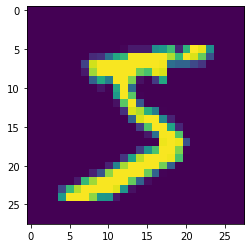

In [2]:
plt.imshow(X[0])

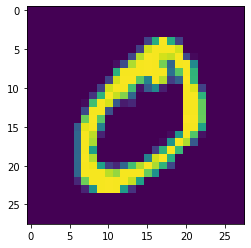

In [3]:
plt.imshow(X[1])

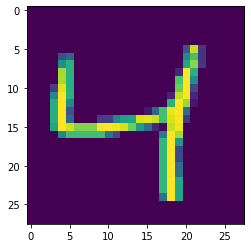

In [4]:
plt.imshow(X[2])

In [5]:
print (y[0], y_oh[0])
print (y[1], y_oh[1])
print (y[2], y_oh[2])
print (y[3], y_oh[3])
print (y[4], y_oh[4])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


<function matplotlib.pyplot.show(close=None, block=None)>

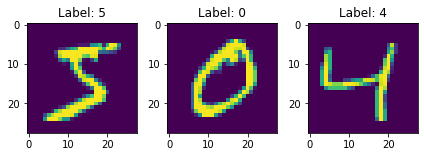

In [6]:
fig,axes = plt.subplots(1,3)
for i in range(3):
    ax = axes[i%3]
    ax.imshow(X[i])
    ax.set_title('Label: {}'.format(y[i]))
plt.tight_layout()
plt.show

### Question 1
**The data set**

Plot a three examples from the data set.
* What type of data are in the data set?

    <span style="color:red"> The data set contains collections of digits with 784 features that are supposed to represent images. X is a collection of 28x28 multidimensional arrays that contains floating point values with each instance of X representing an image, while y is a collection of integers that are supposed to classify its corresponding image (the X array) into different categories based on the y value (the y value is supposed to match the number being displayed on the image). </span>
    

* What does the line ```X = X.reshape(X.shape[0], 28, 28, 1)``` do?

    <span style="color:red"> The line converts X into a four dimensional array of dimension 1000 x 28 x 28 x 1, this is likely done to ensure that the data is compatible with the keras API. In particular, because the data fetched from mnist_784 are 28 x 28 images, X would need to be in the correct dimension in order to be both displayed correctly and fitted onto the neural network, which explains why X has to be 28 x 28. </span>
    

Look at how the encoding of the targets (i.e. ```y```) is changed. E.g. the lines
```
    y_oh = np.zeros((num_tot, num_classes))
    y_oh[range(num_tot), y] = 1
```
Print out a few rows of ```y``` next to ```y_oh```.
* What is the relationship between ```y``` and ```y_oh```?

    <span style="color:red"> y_oh is the design (dummy) variable encoding for y, the columns of y_oh consists of all of the different possible values for y, and a value of 1 is used to indicate which particular value y_oh takes on. </span>
    
    
* What is the type of encoding in ```y_oh``` called and why is it used?

    <span style="color:red"> The type of coding used in y_oh is called one hot encoding, and this encoding is performed in order to properly assign losses value to y since y is an unordered categorical variable. As y is a categorical (not ordinal) variable, the distance between different values of the variable has no meaning, and assigning regular integer value to y would cause problem when comparing losses values as this would be akin to comparing apples to oranges (the loss value between a predicted value of 5 and 1 for y would be greater than between a predicted value of 3 and 4, even though they are both equally wrong predictions and should have the same loss value). </span>
    
    
* Plot three data examples in the same figure and set the correct label as title. 
    * It should be possible to see what the data represent.

### Question 2
**The model**

Below is some code for bulding and training a model with Keras.
* What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?

    <span style="color:red"> The type of network implemented is Convolutional Neural Network (CNN) since it has both a convolution layer and pooling layer (the typical structure for CNN). </span>
    
    
* What does ```Dropout()``` do?

    <span style="color:red"> Dropout() randomly select input units at a predefined rate (given as a percentage probability) during each weight update cycle of the training process and set those units to 0 (drop them from the model). This is the done in order to prevent overfitting, since some input units are set to 0, those are that not set to 0 are scaled up by 1(1-rate) in order to ensure that the total sum of all inputs remains the same. </span>


* Which type of activation function is used for the hidden layers?

    <span style="color:red"> The hidden layers use the Rectifier Linear Unit (ReLU) activation function, which outputs the same value as the input value when the input is positive, and outputs 0 otherwise. </span>


* Which type of activation function is used for the output layer?

    <span style="color:red"> The output layer uses the softmax activation function in order to normalize the output to the proper probability space (with values between 0 and 1). </span>


* Why are two different activation functions used?

    <span style="color:red"> The hidden layers use the ReLU activation function in order to mitigate the vanishing gradient problem, since having negative values would lead to an increasingly small gradient during back-propagation. This would prevent those layers located further away from the output layer from being trained during each weight update cycle. This issue is particularly bad for a sequential model with many layers.
The output layer uses the softmax activation function to normalize the output to the probability space since the model is used for classification and requires the output to be a probability value between 0 and 1.
 </span>


* What optimizer is used in the model below?

    <span style="color:red"> The optimizer is called Stochastic Gradient Descent (SGD). </span>


* How often are the weights updated (i.e. after how many data examples)?

    <span style="color:red"> The weights are updated after 32 data examples since the batch size is set to 32. </span>


* What loss function is used?

    <span style="color:red"> The loss function used is categorical cross-entropy. </span>


* How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?

    <span style="color:red"> There are 108,618 parameters in total in this model. </span>


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

c:\users\bo wu\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
25/25 [==============================] - 0s 5ms/step - loss: 2.1367
Epoch 2/60
25/25 [==============================] - 0s 4ms/step - loss: 1.0638
Epoch 3/60
25/25 [==============================] - 0s 4ms/step - loss: 0.5037
Epoch 4/60
25/25 [==============================] - 0s 4ms/step - loss: 0.3274
Epoch 5/60
25/25 [==============================] - 0s 4ms/step - loss: 0.2436
Epoch 6/60
25/25 [==============================] - 0s 4ms/step - loss: 0.1925
Epoch 7/60
25/25 [==============================] - 0s 4ms/step - loss: 0.1752
Epoch 8/60
25/25 [==============================] - 0s 4ms/step - loss: 0.1191
Epoch 9/60
25/25 [==============================] - 0s 4ms/step - loss: 0.0964
Epoch 10/60
25/25 [==============================] - 0s 4ms/step - loss: 0.0674
Epoch 11/60
25/25 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 12/60
25/25 [==============================] - 0s 4ms/step - loss: 0.0434
Epoch 13/60
25/25 [==============================

## Part 2 - train a model

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Here you will get to explore some of the factors that affect model performance. Much of the skill in training deep learning models lies in quickly finding good values/options for these choises.

In order to observe the learning process it is best to compare the training set loss with the loss on the test set. How to visualize these variables with Keras is described under [Training history visualization](https://keras.io/visualization/#training-history-visualization) in the documentation.

You will explore the effect of 1) optimizer, 2) training duration, and 3) dropout (see the question above).

When training, an **epoch** is one pass through the full training set.

### Question 3

* **Vizualize the training**. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss? 
    * Remember to first reset the weights (this can be done by calling ```model.compile()```), otherwise the training just continues from where it was stopped earlier.
    
     <span style="color:red"> The optimal number of epochs for minimizing the test set loss is 6. </span>

* **Optimizer**. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.
    * *NOTE* that how long the training takes varies with optimizer. I.e., make sure that the model is trained for long enough to reach optimal performance.

* **Dropout**. Use the best optimizer and do hyper-parameter seach and find the best value for ```Dropout()```.

* **Best model**. Combine the what you learned from the above three questions to build the best model. How much better is it than the worst and average models?

    <span style="color:red"> Based on the result of the hyper-parameter tuning, the best model was found to be one that uses the Adam optimizer with a learning rate of 0.01, a beta 1 value of 0.5, a beta 2 value of 0.95, an epsilon value of 7e-8, with amsgrad set to false, and with a dropout rate of 0.2. This model had an accuracy of 0.99, which is 4.21% better than the worst model - the sgd model with an accuracy of 0.95, and about 2.86% better than the average accuracy of the three models, which is a value of (0.95+0.9625+0.975)/3 = 0.9625. </span>
    



* **Results on the test set**. When doing this search for good model configuration/hyper-parameter values, the data set was split into *two* parts: a training set and a test set (the term "validation" was used interchangably wiht "test"). For your final model, is the performance (i.e. accuracy) on the test set representative for the performance one would expect on a previously unseen data set (drawn from the same distribution)? Why?

    <span style="color:red"> The performance on the test set for the final model would not be representative of the performance one would expect on a previously unseen data set. This is due to the fact that the test set was used for selecting the best possible model, so whatever model that was selected could be biased toward the test set data. Since test set is used during the model selection process, it is considered a validation set and not a true test set. As a result, the final model performance on the test set may still be optimistic compared to using a never before seen data set. </span>


## Further information
For ideas about hyper-parameter tuning, take a look at the strategies described in the sklearn documentation under [model selection](https://scikit-learn.org/stable/model_selection.html), or in this [blog post](https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html) from TensorFlow. For a more thorough discussion about optimizers see [this video](https://www.youtube.com/watch?v=DiNzQP7kK-s) discussing the article [Descending through a Crowded Valley -- Benchmarking Deep Learning Optimizers](https://arxiv.org/abs/2007.01547).


**Good luck!**

In [12]:
model.compile()

In [13]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
compare = model.fit(X, y_oh, validation_split =.2, shuffle=True, batch_size=32, epochs=150, verbose=0)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

c:\users\bo wu\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.2017
Accuracy: 0.98


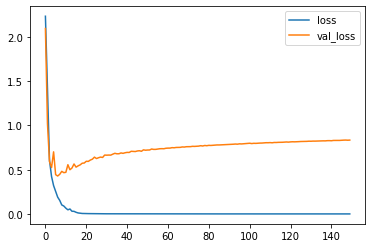

In [14]:
from matplotlib import pyplot as plt

import pandas as pd
p = pd.DataFrame(compare.history)
p.plot()
plt.show()

In [15]:
np.argmin(p['val_loss'])

6

In [10]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [7]:
def model_builder(hp):
    
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))

    model.add(Dense(10, activation='softmax'))


    hp_lr = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
    hp_momentum = hp.Float('momentum', min_value=0.1, max_value=1, step=0.1)

    # Compile the model
    model.compile(optimizer=keras.optimizers.SGD(lr=hp_lr, decay=1e-6, momentum=hp_momentum, nesterov=True),loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

    return model

In [8]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=30,
                     factor=3,
                     directory='my_dir',
                     project_name='tuning')

c:\users\bo wu\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
tuner.search(X_train, y_oh_train, epochs=50, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Trial 55 Complete [00h 00m 01s]
val_accuracy: 0.90625

Best val_accuracy So Far: 0.949999988079071
Total elapsed time: 00h 00m 46s
INFO:tensorflow:Oracle triggered exit


In [10]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal momentum for the optimizer is {best_hps.get('momentum')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal momentum for the optimizer is 0.8 and the optimal learning rate for the optimizer
is 0.1.



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

def model_builder2(hp):
    
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))

    model.add(Dense(10, activation='softmax'))


    hp_lr = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
    hp_centered = hp.Choice('centered', values=[True,False])
    hp_momentum = hp.Float('momentum', min_value=0.1, max_value=1, step=0.1)
    hp_rho = hp.Float('rho', min_value=0.9, max_value=1, step=0.01)
    hp_epsilon = hp.Float('epsilon', min_value=1e-8, max_value=1e-7, step=1e-8)

    # Compile the model
    model.compile(optimizer=keras.optimizers.RMSprop(lr=hp_lr, momentum = hp_momentum, rho=hp_rho, epsilon=hp_epsilon, centered=hp_centered), loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

    return model

In [12]:
tuner = kt.Hyperband(model_builder2,
                     objective='val_accuracy',
                     max_epochs=30,
                     factor=3,
                     directory='my_dir',
                     project_name='tuning2')

c:\users\bo wu\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [13]:
tuner.search(X_train, y_oh_train, epochs=50, validation_split=0.2)

Trial 90 Complete [00h 00m 04s]
val_accuracy: 0.9312499761581421

Best val_accuracy So Far: 0.9624999761581421
Total elapsed time: 00h 02m 00s
INFO:tensorflow:Oracle triggered exit


In [14]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning for the optimizer is {best_hps.get('learning_rate')}, the optimal momentum for the optimizer
is {best_hps.get('momentum')}, the optimal rho for the optimizer is {best_hps.get('rho')}, , the optimal epsilon for the optimizer
is {best_hps.get('epsilon')}, centered for the optimizer should be set to {best_hps.get('centered')}.
""")


The hyperparameter search is complete. The optimal learning for the optimizer is 0.001, the optimal momentum for the optimizer
is 0.30000000000000004, the optimal rho for the optimizer is 0.9900000000000001, , the optimal epsilon for the optimizer
is 7e-08, centered for the optimizer should be set to 1.



In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


def model_builder3(hp):
    
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.))

    model.add(Dense(10, activation='softmax'))


    hp_lr = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
    hp_amsgrad = hp.Choice('amsgrad', values=[True,False])
    hp_beta1 = hp.Float('beta1', min_value=0.1, max_value=1, step=0.1)
    hp_beta2 = hp.Float('beta2', min_value=0.9, max_value=1, step=0.01)
    hp_epsilon = hp.Float('epsilon', min_value=1e-8, max_value=1e-7, step=1e-8)

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(lr=hp_lr, beta_1 = hp_beta1, beta_2=hp_beta2, epsilon=hp_epsilon, amsgrad=hp_amsgrad), loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

    return model

In [16]:
tuner = kt.Hyperband(model_builder3,
                     objective='val_accuracy',
                     max_epochs=30,
                     factor=3,
                     directory='my_dir',
                     project_name='tuning3')

c:\users\bo wu\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
tuner.search(X_train, y_oh_train, epochs=50, validation_split=0.2)

Trial 90 Complete [00h 00m 04s]
val_accuracy: 0.9624999761581421

Best val_accuracy So Far: 0.9750000238418579
Total elapsed time: 00h 02m 00s
INFO:tensorflow:Oracle triggered exit


In [18]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning for the optimizer is {best_hps.get('learning_rate')}, the optimal beta1 for the optimizer
is {best_hps.get('beta1')}, the optimal beta2 for the optimizer is {best_hps.get('beta2')}, , the optimal epsilon for the optimizer
is {best_hps.get('epsilon')}, amsgrad for the optimizer should be set to {best_hps.get('amsgrad')}.
""")


The hyperparameter search is complete. The optimal learning for the optimizer is 0.01, the optimal beta1 for the optimizer
is 0.5, the optimal beta2 for the optimizer is 0.9500000000000001, , the optimal epsilon for the optimizer
is 7e-08, amsgrad for the optimizer should be set to 0.



In [ ]:
model.compile()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


def model_builder4(hp):
    
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=hp.Float('dropout', min_value = 0, max_value = 0.9, step = 0.1)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value = 0, max_value = 0.9, step = 0.1)))

    model.add(Dense(10, activation='softmax'))

    
   
    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(lr=0.01, beta_1 = 0.5, beta_2=0.95, epsilon=7e-08, amsgrad=False), loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

    return model

In [12]:
tuner = kt.Hyperband(model_builder4,
                     objective='val_accuracy',
                     max_epochs=30,
                     factor=3,
                     directory='my_dir',
                     project_name='tuning4')

c:\users\bo wu\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
tuner.search(X_train, y_oh_train, epochs=50, validation_split=0.2)

Trial 10 Complete [00h 00m 00s]
val_accuracy: 0.800000011920929

Best val_accuracy So Far: 0.925000011920929
Total elapsed time: 00h 00m 07s
INFO:tensorflow:Oracle triggered exit


In [14]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal dropout rate for the optimizer is {best_hps.get('dropout')}.
""")


The hyperparameter search is complete. The optimal dropout rate for the optimizer is 0.2.



In [20]:
model.compile()

In [21]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.01, beta_1 = 0.5, beta_2=0.95, epsilon=7e-08, amsgrad=False)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adam)

# Train the model
compare = model.fit(X, y_oh, validation_split =.2, shuffle=True, batch_size=32, epochs=150, verbose=0)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

c:\users\bo wu\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.5164
Accuracy: 0.99


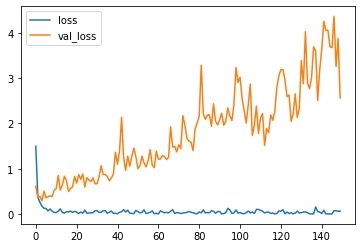

In [22]:
from matplotlib import pyplot as plt

import pandas as pd
p = pd.DataFrame(compare.history)
p.plot()
plt.show()

In [23]:
np.argmin(p['val_loss'])

3